In [88]:
# IPython magic to allow inline plots
%matplotlib inline

import os # for file and pathname handling functions
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Set the default matplotlib figure size to be a bit bigger than default
plt.rcParams['figure.figsize'] = (16,9)

In [89]:
#pano = np.asarray(Image.open(os.path.expanduser('pano2.jpg')))
pano = np.asarray(Image.open(os.path.expanduser('app/static/mirror.png')))
plt.show()

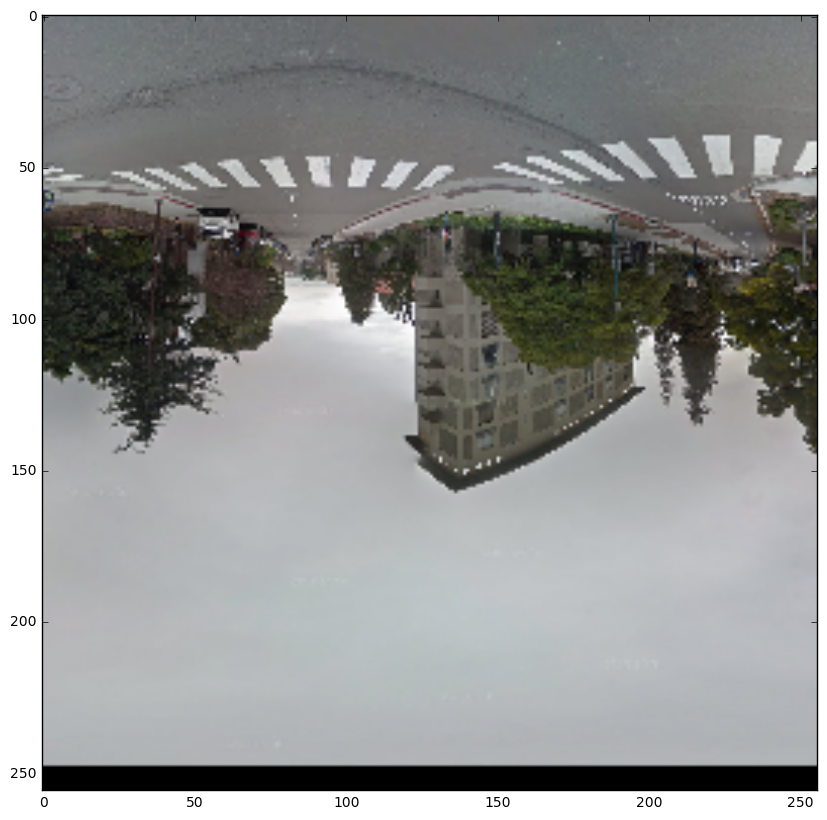

In [90]:
from skimage.transform import warp

def scale_by_5_and_offset(coords):
    out = coords * 5
    out[:,0] += 1000
    out[:,1] += 300
    return out

plt.figure(figsize=(10,10)) # A square figure for square output
plt.imshow(warp(pano, scale_by_5_and_offset, output_shape=(256,256)))

In [91]:
# What shape will the output be?
output_shape = (1080,1080) # rows x columns

def output_coord_to_r_theta(coords):
    """Convert co-ordinates in the output image to r, theta co-ordinates.
    The r co-ordinate is scaled to range from 0 to 1. The theta
    co-ordinate is scaled to range from 0 to 1.
    
    A Nx2 array is returned with r being the first column and theta being
    the second.
    """
    # Calculate x- and y-co-ordinate offsets from the centre:
    x_offset = coords[:,0] - (output_shape[1]/2)
    y_offset = coords[:,1] - (output_shape[0]/2)
    
    # Calculate r and theta in pixels and radians:
    r = np.sqrt(x_offset ** 2 + y_offset ** 2)
    theta = np.arctan2(y_offset, x_offset)
    
    # The maximum value r can take is the diagonal corner:
    max_x_offset, max_y_offset = output_shape[1]/2, output_shape[0]/2
    max_r = np.sqrt(max_x_offset ** 2 + max_y_offset ** 2)
    
    # Scale r to lie between 0 and 1
    r = r / max_r
    
    # arctan2 returns an angle in radians between -pi and +pi. Re-scale
    # it to lie between 0 and 1
    theta = (theta + np.pi) / (2*np.pi)
    
    # Stack r and theta together into one array. Note that r and theta are initially
    # 1-d or "1xN" arrays and so we vertically stack them and then transpose
    # to get the desired output.
    return np.vstack((r, theta)).T

In [92]:
# This is the shape of our input image
input_shape = pano.shape

def r_theta_to_input_coords(r_theta):
    """Convert a Nx2 array of r, theta co-ordinates into the corresponding
    co-ordinates in the input image.
    
    Return a Nx2 array of input image co-ordinates.
    
    """
    # Extract r and theta from input
    r, theta = r_theta[:,0], r_theta[:,1]
    
    # Theta wraps at the side of the image. That is to say that theta=1.1
    # is equivalent to theta=0.1 => just extract the fractional part of
    # theta
    theta = theta - np.floor(theta)
    
    # Calculate the maximum x- and y-co-ordinates
    max_x, max_y = input_shape[1]-1, input_shape[0]-1
    
    # Calculate x co-ordinates from theta
    xs = theta * max_x
    
    # Calculate y co-ordinates from r noting that r=0 means maximum y
    # and r=1 means minimum y
    ys = (1-r) * max_y
    
    # Return the x- and y-co-ordinates stacked into a single Nx2 array
    return np.hstack((xs, ys))



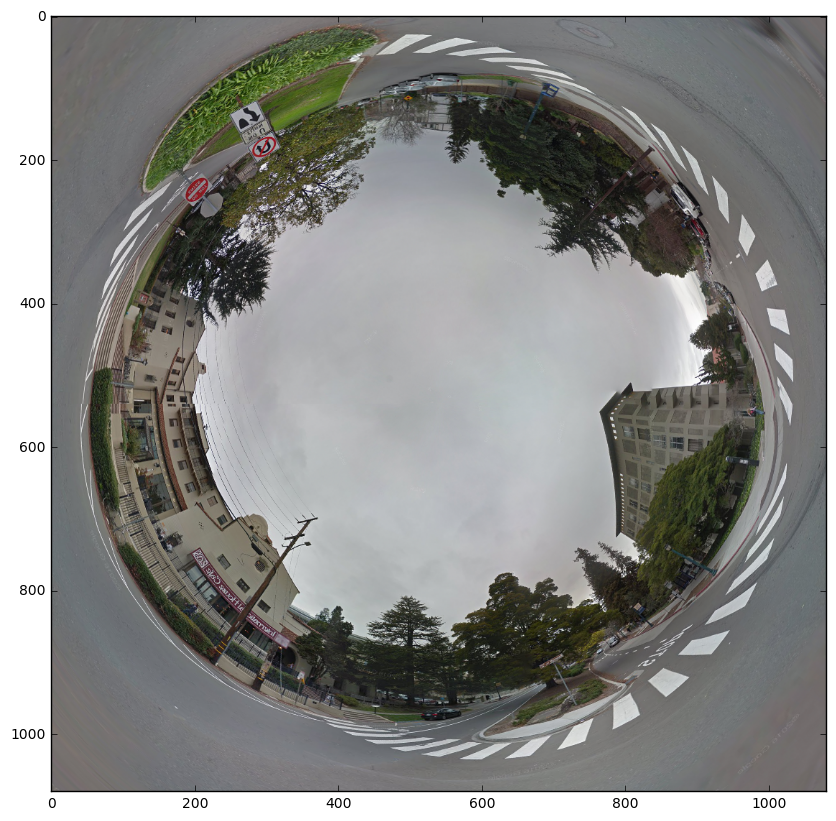

In [93]:
def little_planet_1(coords):
    """Chain our two mapping functions together."""
    r_theta = output_coord_to_r_theta(coords)
    input_coords = r_theta_to_input_coords(r_theta)
    return input_coords

plt.figure(figsize=(10,10))
plt.imshow(warp(pano, little_planet_1, output_shape=output_shape))

In [65]:
img = plt.imread('app/static/mirror.png')
img.shape


(1536, 3584, 3)

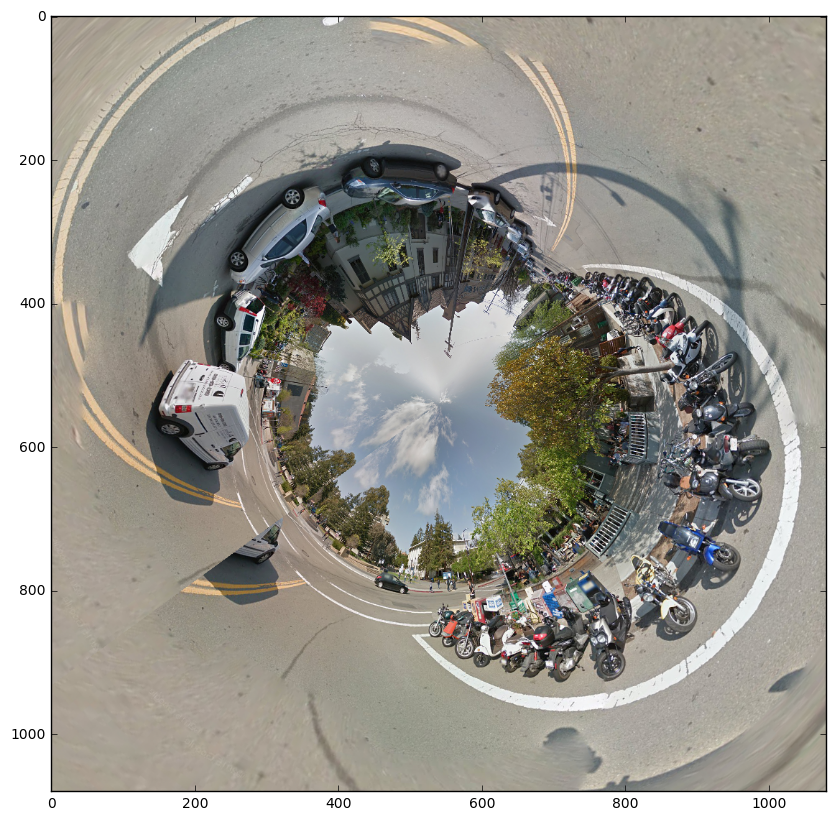

In [38]:
def little_planet_3(coords):
    """Chain our two mapping functions together with modified r
    and shifted theta.
    
    """
    r_theta = output_coord_to_r_theta(coords)
    
    # Take square root of r
    r_theta[:,0] = np.sqrt(r_theta[:,0])
    
    # Shift theta
    r_theta[:,1] += 0.1
    
    input_coords = r_theta_to_input_coords(r_theta)
    return input_coords

plt.figure(figsize=(10,10))
plt.imshow(warp(pano, little_planet_3, output_shape=output_shape))

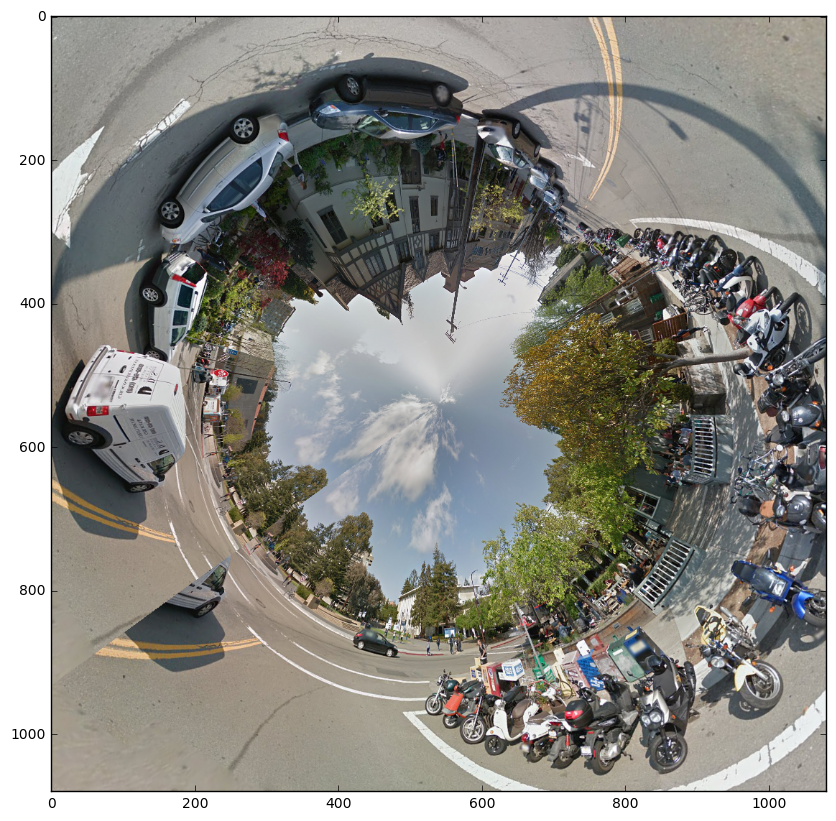

In [39]:
def little_planet_4(coords):
    """Chain our two mapping functions together with modified and
    scaled r and shifted theta.
    
    """
    r_theta = output_coord_to_r_theta(coords)
    
    # Scale r down a little to zoom in
    r_theta[:,0] *= 0.75
    
    # Take square root of r
    r_theta[:,0] = np.sqrt(r_theta[:,0])
    
    # Shift theta
    r_theta[:,1] += 0.1
    
    input_coords = r_theta_to_input_coords(r_theta)
    return input_coords

plt.figure(figsize=(10,10))
plt.imshow(warp(pano, little_planet_4, output_shape=output_shape))



In [72]:
plt.figure(figsize=(10,10))
plt.imshow(warp(pano, tform.inverse, little_planet_4, output_shape=output_shape ))

NameError: name 'tform' is not defined